<a href="https://colab.research.google.com/github/SauloVCRamalho/Regression-and-Prediction/blob/main/time_test_in_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Calculate linear regression by 2 different methods and compare the processing speed between the methods presented. The comparison will be performed with the same dataset in all methods.

When we talk about machine learning, one of the techniques widely used in this field is linear regression. When using linear regression in machine learning, we rarely work with the entirety of the data at once, working in blocks to train the data and avoid overffiting. Sometimes we work with a huge amount of data and the number of blocks are chosen by the data scientist in a way that best fits the problem. For the application of linear regression, we have several methods available, and each one with its peculiarities such as precision and execution speed.

In this work we do not aim to train a model, so we will work with only one "block" in order to determine the processing speed of each method in relation to an amount of data "n".

In [ ]:
#reset all values
%reset -f

In [ ]:
#import packages
import pandas as pd
import numpy as np
import random
import json
import matplotlib.pyplot as plt
from time import process_time_ns
from sklearn.linear_model import LinearRegression

In [ ]:
######################################################
# Creating random data
###################################################
lista_x=[]
lista_y=[]
number=50000
for i in np.arange(number):
  rand1=random.uniform(-2+i/10,2+i/10)
  rand2=random.uniform(-3+i/5,3+i/5)
  lista_x.append(2*i+5+rand2)
  lista_y.append(i+rand1)

In [ ]:
# saving data in json file
dictionary_data = {"x": lista_x, "y": lista_y}

data_file = open("data.json", "w")
json.dump(dictionary_data, data_file)
data_file.close()

#importing json file with data
data_file = open("data.json", "r")
output = data_file.read()
print(output)

{"x": [2.6148534385027293, 6.057545105266737, 7.739291622338508, 13.971527657496525, 13.430428392641963, 15.991812731918902, 16.46843897979887, 18.582025970456478, 21.00877391056111, 22.17323562497898, 27.570041046643688, 26.25531829349221, 32.87963673467217, 36.00602349953362, 34.757676577123284, 40.38597778541867, 39.28496872457099, 41.96452637400651, 45.293546828323045, 46.41182062461702, 47.67564781387728, 49.3569613851639, 53.27098433860258, 53.02246224502495, 58.140856371744476, 61.42348243548137, 63.204368181509565, 61.818780393048655, 65.34030494061768, 69.83880953331084, 71.96623258822736, 72.5609379519733, 76.6554906744959, 79.09462707357737, 82.20205775890034, 81.09209068958565, 82.93791139468718, 87.38556535299733, 89.63425603179675, 90.38190880599653, 95.56257253514954, 92.24905840628001, 95.33765101420039, 100.23542284818116, 99.81712107351726, 103.45406280010664, 108.77961951808346, 111.06591581999278, 107.69961981387623, 115.33563855341282, 113.40778407432065, 119.05147

In [ ]:
#delet lista_x and lista_y of memory
del lista_x, lista_y

In [ ]:
#transform json data in dictionary
dict_f=json.loads(output)

In [ ]:
data_tab=pd.DataFrame(dict_f)
data_tab.head(8)

,x,y
0,2.614853,-0.238292
1,6.057545,0.627755
2,7.739292,3.610728
3,13.971528,1.591093
4,13.430428,4.055808
5,15.991813,5.395128
6,16.468439,6.639744
7,18.582026,8.937312


In [ ]:
###################################################
# Creating lists to beginning least squares method
##################################################
#list of time duration
lista_t=[]
#list of Angular coefficient 
lista_b=[]
#list of linear coefficient
lista_a=[]
#list of "x" values
xi=list(data_tab['x'])
# mean of values in x_i list
mean_xi=np.mean(xi)
#list of "y" values
yi=list(data_tab['y'])
# mean of values in y_i list
mean_yi=np.mean(yi)

In [ ]:
############################################
#Least squares method
###########################################
t1_start = process_time_ns() 
b=sum((np.array(xi)-mean_xi*np.ones(len(xi)))*(np.array(yi)-mean_yi*np.ones(len(xi))))/sum((np.array(xi)-mean_xi*np.ones(len(xi)))**2)
a=mean_yi-b*mean_xi
t1_stop = process_time_ns()
lista_t.append(t1_stop-t1_start)
lista_b.append(b)
lista_a.append(a) 
print("Coeficiente angular:",b)
print("Coeficiente linear:",a)
print("Elapsed time:", t1_stop - t1_start)

Coeficiente angular: 0.49999990779757403
Coeficiente linear: -2.4944507991058344
Elapsed time: 38374679


In [ ]:
X=np.array(xi)
Y=b*X+a

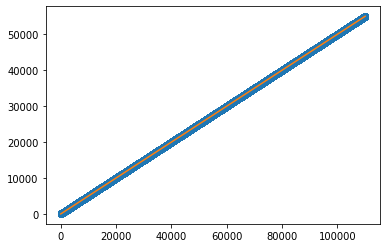

In [ ]:
plt.plot(xi,yi, 'o')
plt.plot(X,Y)
plt.show()

In [ ]:
###################################################
# Creating lists to beginning least squares method
##################################################
#list of time duration
lista_t=[]
#list of Angular coefficient 
lista_b=[]
#list of linear coefficient
lista_a=[]
#list of "x" values
xi=list(data_tab['x'])
# mean of values in x_i list
mean_xi=np.mean(xi)
#list of "y" values
yi=list(data_tab['y'])
# mean of values in y_i list
mean_yi=np.mean(yi)

In [ ]:
#####################################################
#least square using vectors
###################################################
#list of time duration
lista_t=[]
#list of Angular coefficient 
lista_b=[]
#list of linear coefficient
lista_a=[]
#list of data number
lista_n=[]
#list of "x" values in json file
xi_t=list(data_tab['x'])
#list of "y" values in json file
yi_t=list(data_tab['y'])
for n in range(10,number,100):
  xi=[xi_t[i] for i in range(0,n,1)]
  yi=[yi_t[i] for i in range(0,n,1)]
  # mean of values in x_i list
  mean_xi=np.mean(xi)
  # mean of values in y_i list
  mean_yi=np.mean(yi)
  #start the timer
  t1_start = process_time_ns() 
  #Angular coefficient 
  b=sum((np.array(xi)-mean_xi*np.ones(len(xi)))*(np.array(yi)-mean_yi*np.ones(len(xi))))/sum((np.array(xi)-mean_xi*np.ones(len(xi)))**2)
  # linear coefficient 
  a=mean_yi-b*mean_xi
  #stop the timer
  t1_stop = process_time_ns()
  #Append value 'n' in list_n
  lista_n.append(n)
  #Append value of timer in list_t
  lista_t.append((t1_stop-t1_start)*10**(-9))
  #append value 'b' in list_b
  lista_b.append(b)
  #append value 'a' in list_a
  lista_a.append(a)

In [ ]:
################################
#Using SKlearning
###############################
#list of time duration
lista_t_sk=[]
#list of Angular coefficient 
lista_b_sk=[]
#list of linear coefficient
lista_a_sk=[]
#list of data number
lista_n_sk=[]
# x_i_t_sk is np.array of 'x' values.
xi_t_sk=data_tab.values[:,:-1]
# y_i_t_sk is np.array of 'y' values.
yi_t_sk=data_tab.values[:,-1]
#looping to creating 
for n in range(10,number,100):
  xi_sk=np.array([xi_t_sk[i] for i in range(0,n,1)])
  yi_sk=np.array([yi_t_sk[i] for i in range(0,n,1)])
  t1_start = process_time_ns() 
  fit=LinearRegression().fit(xi_sk, yi_sk)
  b=fit.coef_.flatten()
  a=fit.intercept_.flatten()
  t1_stop = process_time_ns()
  lista_n_sk.append(n)
  lista_t_sk.append((t1_stop-t1_start)*10**(-9))
  lista_b_sk.append(b)
  lista_a_sk.append(a)

In [ ]:
##############################################################
#  Organizing data
##############################################################


In [ ]:
dict_min_square={'Number of data':lista_n,'Time':lista_t,'Angular Coefficient':lista_b,'linear Coefficient':lista_a}
dict_sk_learning={'Number of data':lista_n_sk,'Time':lista_t_sk,'Angular Coefficient':lista_b_sk,'linear Coefficient':lista_a_sk}

In [ ]:
pd.DataFrame(dict_min_square).head()

,Number of data,Time,Angular Coefficient,linear Coefficient
0,10,0.000093,0.542399,-2.404183
1,110,0.000100,0.497788,-2.154856
2,210,0.000155,0.499234,-2.333660
3,310,0.000230,0.499807,-2.430757
4,410,0.000270,0.499852,-2.437585


In [ ]:
pd.DataFrame(dict_sk_learning).head()

,Number of data,Time,Angular Coefficient,linear Coefficient
0,10,0.001002,[0.5423992634543517],[-2.404183317719279]
1,110,0.000738,[0.4977881176149568],[-2.1548559345148135]
2,210,0.000743,[0.4992338170843404],[-2.333660285692318]
3,310,0.000480,[0.4998066296900701],[-2.4307569063097674]
4,410,0.000410,[0.4998517003314375],[-2.4375853702342454]


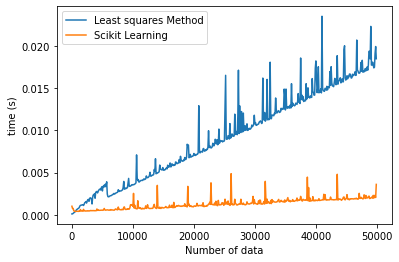

In [ ]:
plt.figure()
plt.xlabel('Number of data')
plt.ylabel('time (s)')
plt.plot(lista_n, lista_t, label='Least squares Method')
plt.plot( lista_n, lista_t_sk , label='Scikit Learning')
plt.legend()
plt.show()

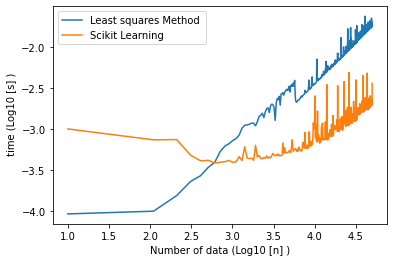

In [ ]:
plt.figure()
plt.xlabel('Number of data (Log10 [n] )')
plt.ylabel(' time (Log10 [s] )')
plt.plot(np.log10(lista_n), np.log10(lista_t), label='Least squares Method ')
plt.plot( np.log10(lista_n), np.log10(lista_t_sk) , label='Scikit Learning ')
plt.legend()
plt.show()

Conclusion: When comparing the two methods worked on this sheet, we can see that each method has an advantage in a certain volume of specific data. Scikit Learning is the method with better processing when training takes into account a large volume of data and Least square method processes a small volume of data faster.